<a href="https://colab.research.google.com/github/Ristoll/AIS_Labs/blob/main/LR_10_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##### Searching optimal parameters for precision_weighted

Grid scores for the parameter grid:
{'max_depth': 2, 'n_estimators': 100} --> Mean: 0.85 (Rank 1)
{'max_depth': 4, 'n_estimators': 100} --> Mean: 0.841 (Rank 5)
{'max_depth': 7, 'n_estimators': 100} --> Mean: 0.844 (Rank 4)
{'max_depth': 12, 'n_estimators': 100} --> Mean: 0.832 (Rank 8)
{'max_depth': 16, 'n_estimators': 100} --> Mean: 0.816 (Rank 9)
{'max_depth': 4, 'n_estimators': 25} --> Mean: 0.846 (Rank 2)
{'max_depth': 4, 'n_estimators': 50} --> Mean: 0.84 (Rank 7)
{'max_depth': 4, 'n_estimators': 100} --> Mean: 0.841 (Rank 5)
{'max_depth': 4, 'n_estimators': 250} --> Mean: 0.845 (Rank 3)

Best parameters: {'max_depth': 2, 'n_estimators': 100}

Performance report:

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        79
         1.0       0.81      0.86      0.83        70
         2.0       0.83      0.91      0.87        76

    accuracy                           0.86

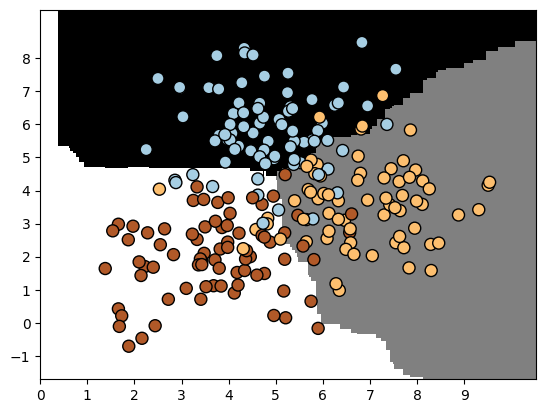

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from utilities import visualize_classifier

# Завантаження даних
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Розбиття на класи
class_0 = X[y == 0]
class_1 = X[y == 1]
class_2 = X[y == 2]

# Розбиття на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Сітка параметрів
parameter_grid = [
    {'n_estimators': [100], 'max_depth': [2, 4, 7, 12, 16]},
    {'max_depth': [4], 'n_estimators': [25, 50, 100, 250]}
]

metrics = ['precision_weighted', 'recall_weighted']

for metric in metrics:
    print("\n##### Searching optimal parameters for", metric)
    classifier = GridSearchCV(
        ExtraTreesClassifier(random_state=0),
        parameter_grid,
        cv=5,
        scoring=metric
    )
    classifier.fit(X_train, y_train)

    print("\nGrid scores for the parameter grid:")
    for params, mean_score, rank in zip(
        classifier.cv_results_['params'],
        classifier.cv_results_['mean_test_score'],
        classifier.cv_results_['rank_test_score']
    ):
        print(f"{params} --> Mean: {round(mean_score, 3)} (Rank {rank})")

    print("\nBest parameters:", classifier.best_params_)

    # Тестування на тестовому наборі
    y_pred = classifier.predict(X_test)
    print("\nPerformance report:\n")
    print(classification_report(y_test, y_pred))

# Візуалізація найкращого класифікатора
visualize_classifier(classifier.best_estimator_, X_test, y_test) #Best classifier
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data_random_forests.txt to data_random_forests.txt
